In [28]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from pandas_datareader import data as wb
import iexfinance as iex
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas

In [29]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [30]:
#iex_key = os.getenv("IEX_TOKEN")
#print(len(iex_key))

In [31]:
#tickers=pd.DataFrame(get_symbols())


# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [32]:
#index = (["SPY", "AGG"])
#end_date = datetime.now()
#start_date = end_date + timedelta(-365)


#df = get_historical_data(index, start_date, end_date, output_format='pandas', close_only=True)
#df.to_pickle("portfolio_planner_data")

In [33]:
df = pd.read_pickle("portfolio_planner_data")
df.sort_index(ascending=True, inplace =True)
df.columns

MultiIndex([('SPY',  'close'),
            ('SPY', 'volume'),
            ('AGG',  'close'),
            ('AGG', 'volume')],
           )

In [34]:
stock_df = df.drop(columns=[['SPY', 'volume'],['AGG', 'volume']])
stock_df.head()

,SPY,AGG
,close,close
date,,
2019-01-25,265.78,106.68
2019-01-28,263.76,106.62
2019-01-29,263.41,106.90
2019-01-30,267.58,107.14
2019-01-31,269.93,107.46


In [35]:
weights = [0.6, 0.4]
portfolio_returns_df = stock_df.dot(weights).to_frame()
portfolio_returns_df.columns = ["Weighted Price"]
portfolio_returns_df.head()

,Weighted Price
date,
2019-01-25,202.140
2019-01-28,200.904
2019-01-29,200.806
2019-01-30,203.404
2019-01-31,204.942


In [36]:
portfolio_daily_returns = portfolio_returns_df.pct_change()
portfolio_daily_returns.head()

,Weighted Price
date,
2019-01-25,NaN
2019-01-28,-0.006115
2019-01-29,-0.000488
2019-01-30,0.012938
2019-01-31,0.007561


In [37]:
portfolio_avg_daily_return_df = portfolio_daily_returns.mean()['Weighted Price']
portfolio_avg_daily_return_df

0.000746847173578503

In [38]:
portfolio_std_dev_avg_daily_return = portfolio_daily_returns.std()['Weighted Price']
portfolio_std_dev_avg_daily_return

0.005792888633440682

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [39]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE

In [83]:
# Calculate volatility
portfolio_volatility = portfolio_daily_returns['Weighted Price'].std() * np.sqrt(252)
portfolio_volatility

0.0919592561806611

In [41]:
# Save the last day's closing price
portfolio_last_price = portfolio_returns_df['Weighted Price'][-1]
portfolio_last_price

242.77799999999996

In [71]:
number_simulations = 500
number_trading_days = 252 * 3
monte_carlo = pd.DataFrame()

In [72]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    simulated_portfolio_prices = [portfolio_last_price]
    for i in range(number_trading_days):
        simulated_price = simulated_portfolio_prices[-1]*(1+ np.random.normal(portfolio_avg_daily_return_df, portfolio_std_dev_avg_daily_return))
        simulated_portfolio_prices.append(simulated_price)
    monte_carlo[f"{n+1}"] = pd.Series(simulated_portfolio_prices)

monte_carlo.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
0,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,...,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000,242.778000
1,242.746821,242.185394,242.478266,242.308968,245.700670,243.115303,243.010497,242.952765,241.258823,240.933303,...,243.009439,243.780178,242.624049,242.032268,242.648571,245.233150,244.079861,240.366226,240.574318,242.472738
2,243.230337,238.904993,242.556133,241.050782,245.621923,244.323502,244.230719,243.260054,241.873350,242.237939,...,243.134707,245.021294,244.551094,242.560258,240.807933,247.160948,244.475871,239.939720,240.370966,242.035691
3,243.059165,239.752178,243.201004,242.321470,246.331369,244.779454,241.383980,243.116348,241.646383,242.109348,...,244.296249,245.551889,245.759604,243.995996,240.732705,248.065003,245.482205,237.983110,240.147343,241.939414
4,240.846598,241.499606,243.031130,242.861940,245.460955,247.919377,240.441626,243.430195,241.306778,244.102257,...,246.471432,246.970967,247.516288,243.509620,241.063300,248.417441,246.675799,236.217669,241.473678,241.645375


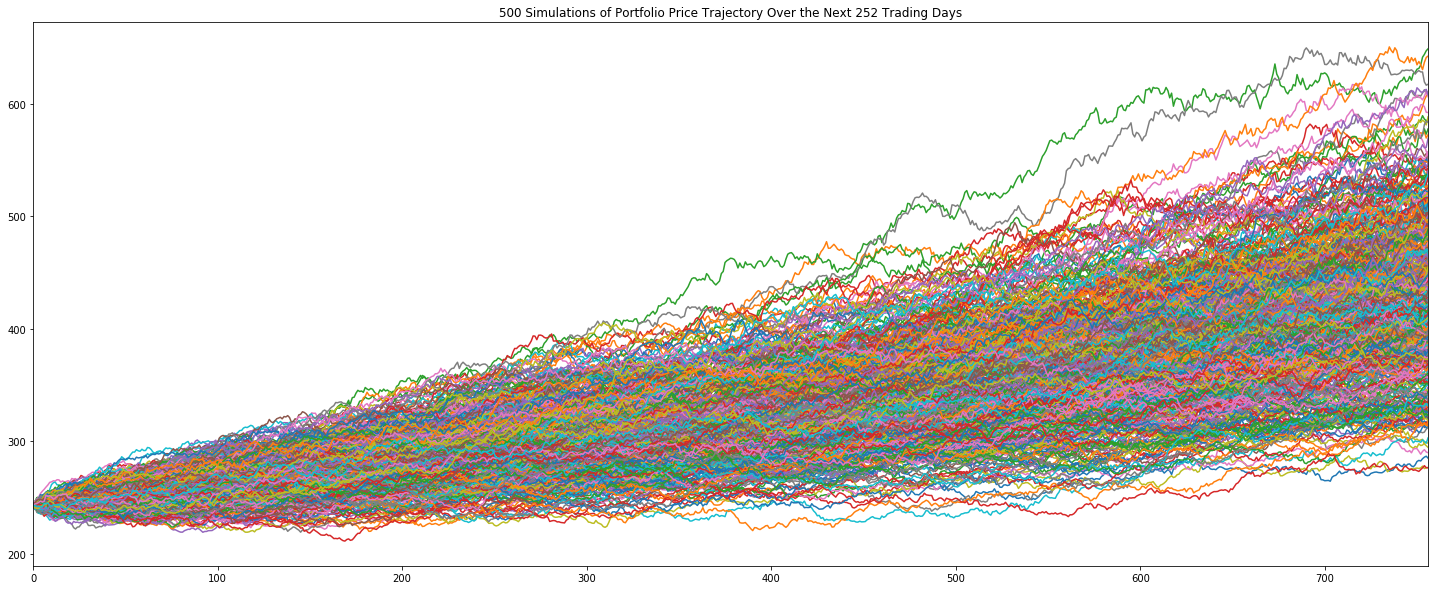

In [73]:
# Visualize the Simulation
plot_title = f"{n+1} Simulations of Portfolio Price Trajectory Over the Next 252 Trading Days"
monte_carlo.plot(figsize= (25,10), legend=None, title=plot_title)


In [64]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = monte_carlo.iloc[-1, :]
ending_cumulative_returns.head()

1    62184.184975
2    88530.610429
3    29571.417396
4    84107.183859
5    92841.038021
Name: 7560, dtype: float64

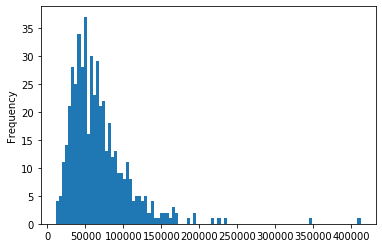

In [74]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns.plot(kind='hist', bins = 100)

In [67]:
# Display the 90% confidence interval for the ending returns
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

(11080.521, 51574.182]      0.414
(51574.182, 91666.914]      0.394
(91666.914, 131759.646]     0.136
(131759.646, 171852.378]    0.040
(211945.111, 252037.843]    0.006
(171852.378, 211945.111]    0.006
(372316.039, 412408.772]    0.002
(332223.307, 372316.039]    0.002
(292130.575, 332223.307]    0.000
(252037.843, 292130.575]    0.000
Name: 7560, dtype: float64

In [68]:
confidence_interval = ending_cumulative_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025     20932.995701
0.975    162384.839080
Name: 7560, dtype: float64

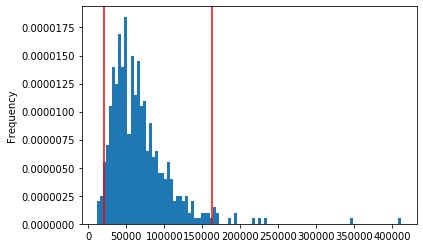

In [70]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=100)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

-------

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [23]:
# Set initial investment
initial_investment = 20_000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval.iloc[0])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval.iloc[1])
                                                    
# Print the results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 252 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 252 trading days will end within in the range of $444900178.6863689 and $3032913556.6877737


### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [75]:
# YOUR CODE HERE

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [76]:
# YOUR CODE HERE


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [77]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?


In [79]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 